In [1]:
import pandas as pd

In [2]:
import seaborn as sa

In [5]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')


In [6]:
df.shape


(500, 9)

In [7]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
x=df.drop(['Chance of Admit '])

KeyError: "['Chance of Admit '] not found in axis"

In [9]:
from sklearn.preprocessing import Binarizer

In [10]:
bi=Binarizer(threshold=0.75)

In [13]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [15]:
x=df.drop('Chance of Admit ',axis=1)

In [16]:
y=df['Chance of Admit ']


In [17]:
y


0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [18]:
y=y.astype('int')

<Axes: xlabel='Chance of Admit ', ylabel='count'>

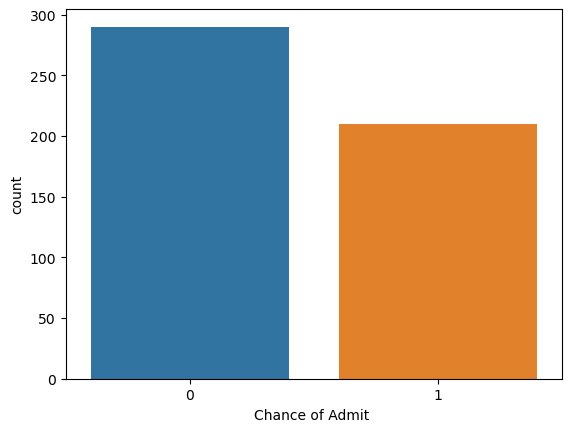

In [19]:
sa.countplot(x=y)

In [20]:
y.value_counts()

0    290
1    210
Name: Chance of Admit , dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [23]:
x_train.shape

(375, 8)

In [25]:
x_test.shape

(125, 8)

In [26]:
y_train.shape

(375,)

In [27]:
y_test.shape

(125,)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
classifier=DecisionTreeClassifier(random_state=0)

In [30]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_pred=classifier.predict(x_test)

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

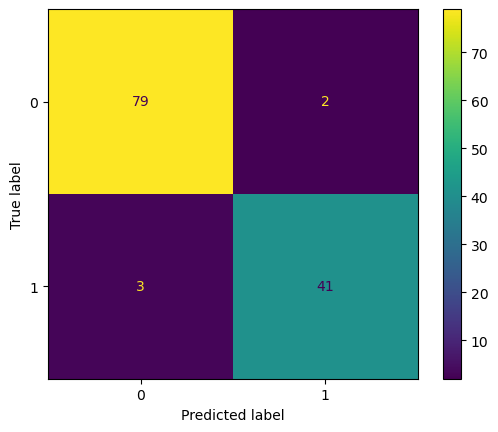

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [35]:
accuracy_score(y_test,y_pred)

0.96

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



In [41]:
new=[[2,324,107,4,4.0,4.5,8.87,1]]

In [42]:
classifier.predict(new)[0]

C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [43]:
from sklearn.tree import plot_tree

In [44]:
plot_tree(classifier,font_size=7,filled=True,rounded=True,feature_names=x.columns,class_name=['NA','A'])

TypeError: plot_tree() got an unexpected keyword argument 'font_size'

In [45]:
plot_tree(classifier,fontsize=7,filled=True,rounded=True,feature_names=x.columns,class_name=['NA','A'])

TypeError: plot_tree() got an unexpected keyword argument 'class_name'

[Text(0.5288461538461539, 0.9583333333333334, 'CGPA <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]\nclass = NA'),
 Text(0.2564102564102564, 0.875, 'GRE Score <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]\nclass = NA'),
 Text(0.14102564102564102, 0.7916666666666666, 'CGPA <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]\nclass = NA'),
 Text(0.11538461538461539, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]\nclass = NA'),
 Text(0.16666666666666666, 0.7083333333333334, 'SOP <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]\nclass = NA'),
 Text(0.10256410256410256, 0.625, 'TOEFL Score <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]\nclass = NA'),
 Text(0.05128205128205128, 0.5416666666666666, 'Serial No. <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = NA'),
 Text(0.02564102564102564, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = A'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsampl

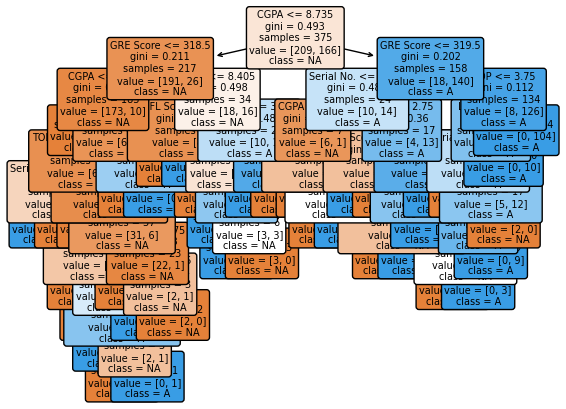

In [46]:
plot_tree(classifier,fontsize=7,filled=True,rounded=True,feature_names=x.columns,class_names=['NA','A'])